In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
print(sp.__version__)

1.11.1


In [2]:
#Definieren
t = sp.Symbol('t')
x = sp.Function('x')(t)
xp = sp.Derivative(x)
xpp = sp.Derivative(xp)

In [3]:
#homogene Lösung
ode = sp.Eq(xpp+3*xp+2*x,0)
sp.dsolve(ode)


Eq(x(t), (C1 + C2*exp(-t))*exp(-t))

In [4]:
#inhomogene Lösung
ode = sp.Eq(xpp+3*xp+2*x,2*sp.sin(t))
sp.dsolve(ode)

Eq(x(t), C1*exp(-2*t) + C2*exp(-t) + sin(t)/5 - 3*cos(t)/5)

Eq(x(t), sin(t)/5 - 3*cos(t)/5 + 2*exp(-t) - 7*exp(-2*t)/5)
                                      -2⋅t
       sin(t)   3⋅cos(t)      -t   7⋅ℯ    
x(t) = ────── - ──────── + 2⋅ℯ   - ───────
         5         5                  5   


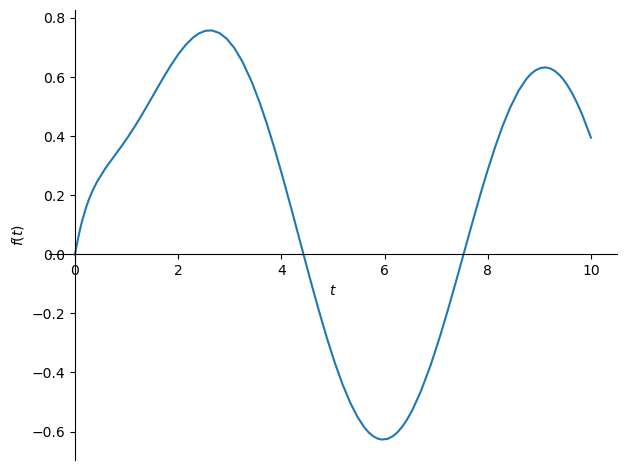

In [5]:
#Anfangswertproblem
ode = sp.Eq(xpp+3*xp+2*x,2*sp.sin(t))
initconds = {x.subs(t, 0): 0, xp.subs(t, 0): 1}# (x(0)=0) (xp(0)=1) 
sol = sp.dsolve(ode,ics=initconds)
print(sol)
sp.pprint(sol)
sp.plot(sol.rhs,(t,0,10)) #t im intervall von 0 bis 10

In [6]:


B = 1.0
L_0 = 0.5 
x_0 = 0.6
dotx_0 = 0.0

h = 0.001
t0 = 0
t1 = 10

In [7]:
def heartrateOde(t,z):
    zp = np.array([z[1], -100*(z[1]*(z[0]**2) - B*z[1] + z[0] - L_0)])
    return zp

In [8]:
def heartrateEuler(h):
    n = int((t1-t0)/h)
    t = np.linspace(t0,t1,n+1)
    z = np.zeros([len(z0),n+1])
    z[:,0] = z0
    for k in range(n):
        z[:,k+1] = z[:,k]+h*heartrateOde(t[k],z[:,k])
    return t, z

[Text(0.5, 0, '$t$'), Text(0, 0.5, '$x$')]

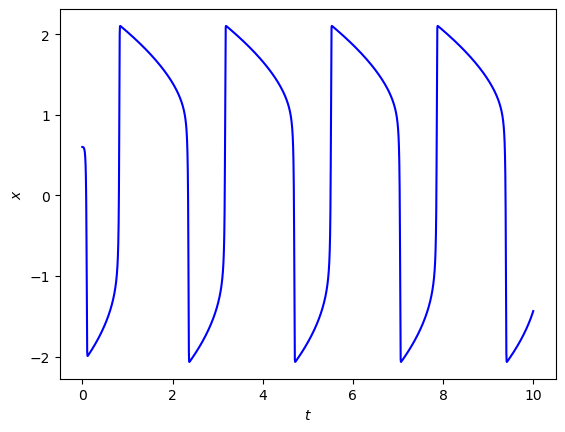

In [9]:
z0 = np.array([x_0, dotx_0])
t, z = heartrateEuler(h)


fig, ax1 = plt.subplots()
ax1.plot(t,z[0,:],'-b')
ax1.set(xlabel='$t$', ylabel='$x$')

[Text(0.5, 0, '$x$'), Text(0, 0.5, 'ẋ')]

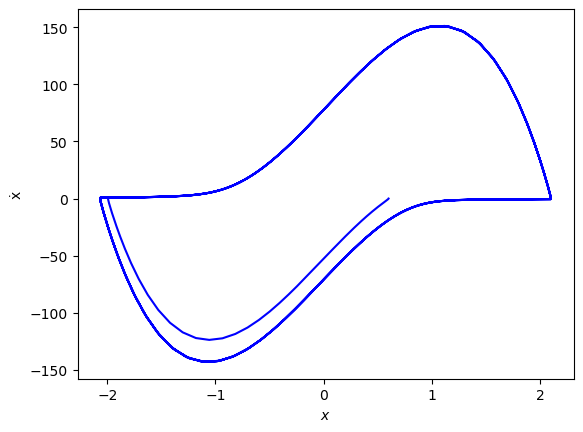

In [10]:
fig, ax3 = plt.subplots()
ax3.plot(z[0,:],z[1,:],'-b')
ax3.set(xlabel='$x$', ylabel="\u0078\u0307") # \u0078\u0307 = x mit Punkt oben drauf